# Multivariable linear regression

## look inside the data

In [66]:
import pandas as pd
df=pd.DataFrame({
                'House dimension': pd.Series([5500,4000,6000,6500]),
                'N Owners': pd.Series([1,3,4,2]),
                'Years': pd.Series([10,5,7,2]),
                'House price':pd.Series([6500,4000,4500,5000])
})
df.head()

,House dimension,House price,N Owners,Years
0,5500,6500,1,10
1,4000,4000,3,5
2,6000,4500,4,7
3,6500,5000,2,2


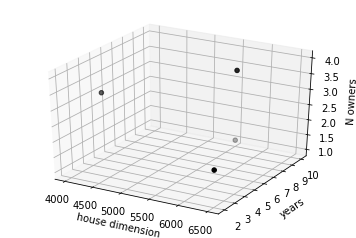

In [67]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

x_axis=df['House dimension']
y_axis=df['Years']
z_axis=df['N Owners']

ax=plt.axes(projection='3d')
ax.set_xlabel('house dimension')
ax.set_ylabel('years')
ax.set_zlabel('N owners')

ax.scatter3D(x_axis, y_axis, z_axis, c='black')

## the model

We have three features as input, so we need 3 parameters plus 1 that is going to be the bias and initialize them to 0 because the optimal ones are going to be found with the optimization algorithm. Then, we store the dataset in a numpy matrix because we are going to use matricies operations and numpy allows to do that. We have to add another column named *x4* which is simply a list of 1s, we need it for the bias parameter which hasn't a feature attached to it. The same format should be done also for the labels.

<img src='ML7.gif'>

In [68]:
import numpy as np

a=0
b=0
c=0
d=0

parameters=np.array([a,b,c,d]).astype(float)

#store features in a single matrix where rows are the examples [N,3]
#N=number of examples and 3 number of features

inputData=np.array(df).astype(float)
#remove the house price column (2 column), because it is going to be used as label.
inputData=np.delete(inputData, 1, axis=1)

inputData

array([[5.5e+03, 1.0e+00, 1.0e+01],
       [4.0e+03, 3.0e+00, 5.0e+00],
       [6.0e+03, 4.0e+00, 7.0e+00],
       [6.5e+03, 2.0e+00, 2.0e+00]])

In [69]:
#add the column of ones as last column
x4=np.ones(len(inputData))

inputData=np.insert(inputData, 3, x4, axis=1)

inputData

array([[5.5e+03, 1.0e+00, 1.0e+01, 1.0e+00],
       [4.0e+03, 3.0e+00, 5.0e+00, 1.0e+00],
       [6.0e+03, 4.0e+00, 7.0e+00, 1.0e+00],
       [6.5e+03, 2.0e+00, 2.0e+00, 1.0e+00]])

In [70]:
#convert to matrix [N,1] the labels
dataLabels=np.array(df['House price']).astype(float)
dataLabels

array([6500., 4000., 4500., 5000.])

## Data preprocessing

Before train the model, as usually we are going to **scale** the data in order allows the model to converge to the optimal solution more quickly.

>**N.B.** We have to scale the examples features and not the 1 used for the bias. Moreover, also the labels must be scaled.


In [71]:
from sklearn import preprocessing

for feature in range(len(inputData[0])-1):
    column=inputData[:,feature]
    inputData[:,feature]=preprocessing.scale(column)

#here the input matrix scaled
inputData

array([[ 0.        , -1.34164079,  1.37198868,  1.        ],
       [-1.60356745,  0.4472136 , -0.34299717,  1.        ],
       [ 0.53452248,  1.34164079,  0.34299717,  1.        ],
       [ 1.06904497, -0.4472136 , -1.37198868,  1.        ]])

In [72]:
#scale the labels
dataLabels=preprocessing.scale(dataLabels)
dataLabels

array([ 1.60356745, -1.06904497, -0.53452248,  0.        ])

## Train the model

We have to define the **hyperparameters** such as learning rate, the number of examples and epochs and scales the features.

We also define some empty lists for see how the error and the parameters change over time.

In [73]:
learningRate=0.001
epochs=2000
#number of examples
N=len(inputData)

def derivate(inputData, error, feature):
    sumOfDerivatives=np.sum(np.multiply(inputData[:,feature],error))
    return -(2/N)*sumOfDerivatives

for epoch in range(epochs):
    #[N,4]*[4,1]=[N,1]
    output=np.matmul(inputData,parameters)
    
    #[N,1]-[N,1]=[N,1]
    error=dataLabels-output
    #sum the square errors and find the averaged error
    errorSqr=(np.sum(error**2))/len(inputData)
    
    #update the parameters
    for parameter in range(len(parameters)):
        if(parameter==3):
            #compute the derivate for the bias
            parameters[3]=parameters[3]-learningRate*np.sum(error)
        
        else:
            #compute the derivate of the parameters (not the bias)
            parameters[parameter]= parameters[parameter] - learningRate*derivate(inputData, error, parameter)

print("parameters after training:" ,parameters)

parameters after training: [ 3.60291669e-01 -6.74205828e-01  4.99637567e-01 -2.08687234e-18]
